In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
movie_df=pd.read_csv('Cleaned_movie.csv')
movie_df

,Unnamed: 0,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,4795,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4413,4796,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4414,4798,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4415,4800,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


In [3]:
# Dropping un wanted columns.
movie_df.drop('Unnamed: 0',axis=1,inplace=True)
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote
4413,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote
4414,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote
4415,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote


In [4]:
movie_df=movie_df[(movie_df.Genres!='Foreign')&(movie_df.Genres!='TV Movie')]

In [5]:
movie_df.Genres.value_counts()

Drama              1090
Comedy              949
Action              723
Adventure           334
Horror              278
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance             100
Science Fiction      94
Family               50
Documentary          48
Mystery              40
Music                33
Western              27
History              23
War                  22
Name: Genres, dtype: int64

In [6]:
#Calculating Average value to use in for loop while creating new column based on condition.
mean_av=movie_df.vote_average.mean()
mean_av

6.183299342850664

In [7]:
# Creating Column Rating For classification problem.
rating=[]
for i in movie_df.vote_average:
    if i > mean_av:
        rating.append('Good')
    elif i >= mean_av/2 and i <=mean_av:
        rating.append('Average')
    elif i < mean_av/2:
        rating.append('Poor')
movie_df['Rating']=rating

In [8]:
# Displaying table after inserting rating column
movie_df

,title_x,budget,original_language,popularity,release_date,revenue,runtime,vote_average,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes,Rating
0,Avatar,237000000,en,150.437577,10-12-2009,2787965087,162.0,7.2,United States of America,Sam Worthington,Zoe Saldana,Ingenious Film Partners,Action,James Cameron,2550965087,High_vote,Good
1,Pirates of the Caribbean: At World's End,300000000,en,139.082615,19-05-2007,961000000,169.0,6.9,United States of America,Johnny Depp,Orlando Bloom,Walt Disney Pictures,Adventure,Gore Verbinski,661000000,Avg_Vote,Good
2,Spectre,245000000,en,107.376788,26-10-2015,880674609,148.0,6.3,United Kingdom,Daniel Craig,Christoph Waltz,Columbia Pictures,Action,Sam Mendes,635674609,Avg_Vote,Good
3,The Dark Knight Rises,250000000,en,112.312950,16-07-2012,1084939099,165.0,7.6,United States of America,Christian Bale,Michael Caine,Legendary Pictures,Action,Christopher Nolan,834939099,High_vote,Good
4,John Carter,260000000,en,43.926995,07-03-2012,284139100,132.0,6.1,United States of America,Taylor Kitsch,Lynn Collins,Walt Disney Pictures,Action,Andrew Stanton,24139100,Avg_Vote,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,Bang,17000000,en,0.918116,09-09-1995,25871834,98.0,6.0,United States of America,Darling Narita,Peter Greene,Asylum Films,Drama,Ash Baron-Cohen,8871834,Less_Vote,Average
4413,Primer,17000000,en,23.307949,08-10-2004,424760,77.0,6.9,United States of America,Shane Carruth,David Sullivan,Thinkfilm,Science Fiction,Shane Carruth,-16575240,Less_Vote,Good
4414,El Mariachi,17000000,es,14.269792,04-09-1992,2040920,81.0,6.6,Mexico,Carlos Gallardo,Jaime de Hoyos,Columbia Pictures,Action,Robert Rodriguez,-14959080,Less_Vote,Good
4415,"Signed, Sealed, Delivered",17000000,en,1.444476,13-10-2013,25871834,120.0,7.0,United States of America,Eric Mabius,Kristin Booth,Front Street Pictures,Comedy,Scott Smith,8871834,Less_Vote,Good


In [9]:
#Cross checking by using value count if any errors are there.
movie_df.Rating.value_counts()

Good       2419
Average    1950
Poor         44
Name: Rating, dtype: int64

In [10]:
# Dropping Vote_Average Column
movie_df.drop('vote_average',axis=1,inplace=True)

In [11]:
# Information of columns
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4413 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title_x                4413 non-null   object 
 1   budget                 4413 non-null   int64  
 2   original_language      4413 non-null   object 
 3   popularity             4413 non-null   float64
 4   release_date           4413 non-null   object 
 5   revenue                4413 non-null   int64  
 6   runtime                4413 non-null   float64
 7   country                4413 non-null   object 
 8   Lead_Actor             4413 non-null   object 
 9   Second_Lead_Actor      4413 non-null   object 
 10  Main_Production_House  4413 non-null   object 
 11  Genres                 4413 non-null   object 
 12  Director               4413 non-null   object 
 13  profit                 4413 non-null   int64  
 14  Votes                  4413 non-null   object 
 15  Rati

In [12]:
#Extracting Year from Release data and dropping Release date
movie_df['Year']=pd.DatetimeIndex(movie_df.release_date).year
movie_df['Month']=pd.DatetimeIndex(movie_df.release_date).month
movie_df.drop('release_date',axis=1,inplace=True)

In [13]:
#Convering the columns from int to object
movie_df.Year=movie_df.Year.astype('object')
movie_df.Month=movie_df.Month.astype('object')

In [14]:
movie_df.nunique()
# title has unique values in each row

title_x                  4411
budget                    301
original_language          34
popularity               4412
revenue                  3237
runtime                   151
country                    64
Lead_Actor               1860
Second_Lead_Actor        2481
Main_Production_House    1290
Genres                     18
Director                 2084
profit                   3350
Votes                       3
Rating                      3
Year                       89
Month                      12
dtype: int64

In [15]:
#Dropping Unique rows in table
movie_df.drop('title_x',axis=1,inplace=True)

In [16]:
# Checking For Duplicaltes
movie_df.duplicated().sum()

0

### EDA

In [17]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4413 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 4413 non-null   int64  
 1   original_language      4413 non-null   object 
 2   popularity             4413 non-null   float64
 3   revenue                4413 non-null   int64  
 4   runtime                4413 non-null   float64
 5   country                4413 non-null   object 
 6   Lead_Actor             4413 non-null   object 
 7   Second_Lead_Actor      4413 non-null   object 
 8   Main_Production_House  4413 non-null   object 
 9   Genres                 4413 non-null   object 
 10  Director               4413 non-null   object 
 11  profit                 4413 non-null   int64  
 12  Votes                  4413 non-null   object 
 13  Rating                 4413 non-null   object 
 14  Year                   4413 non-null   object 
 15  Mont

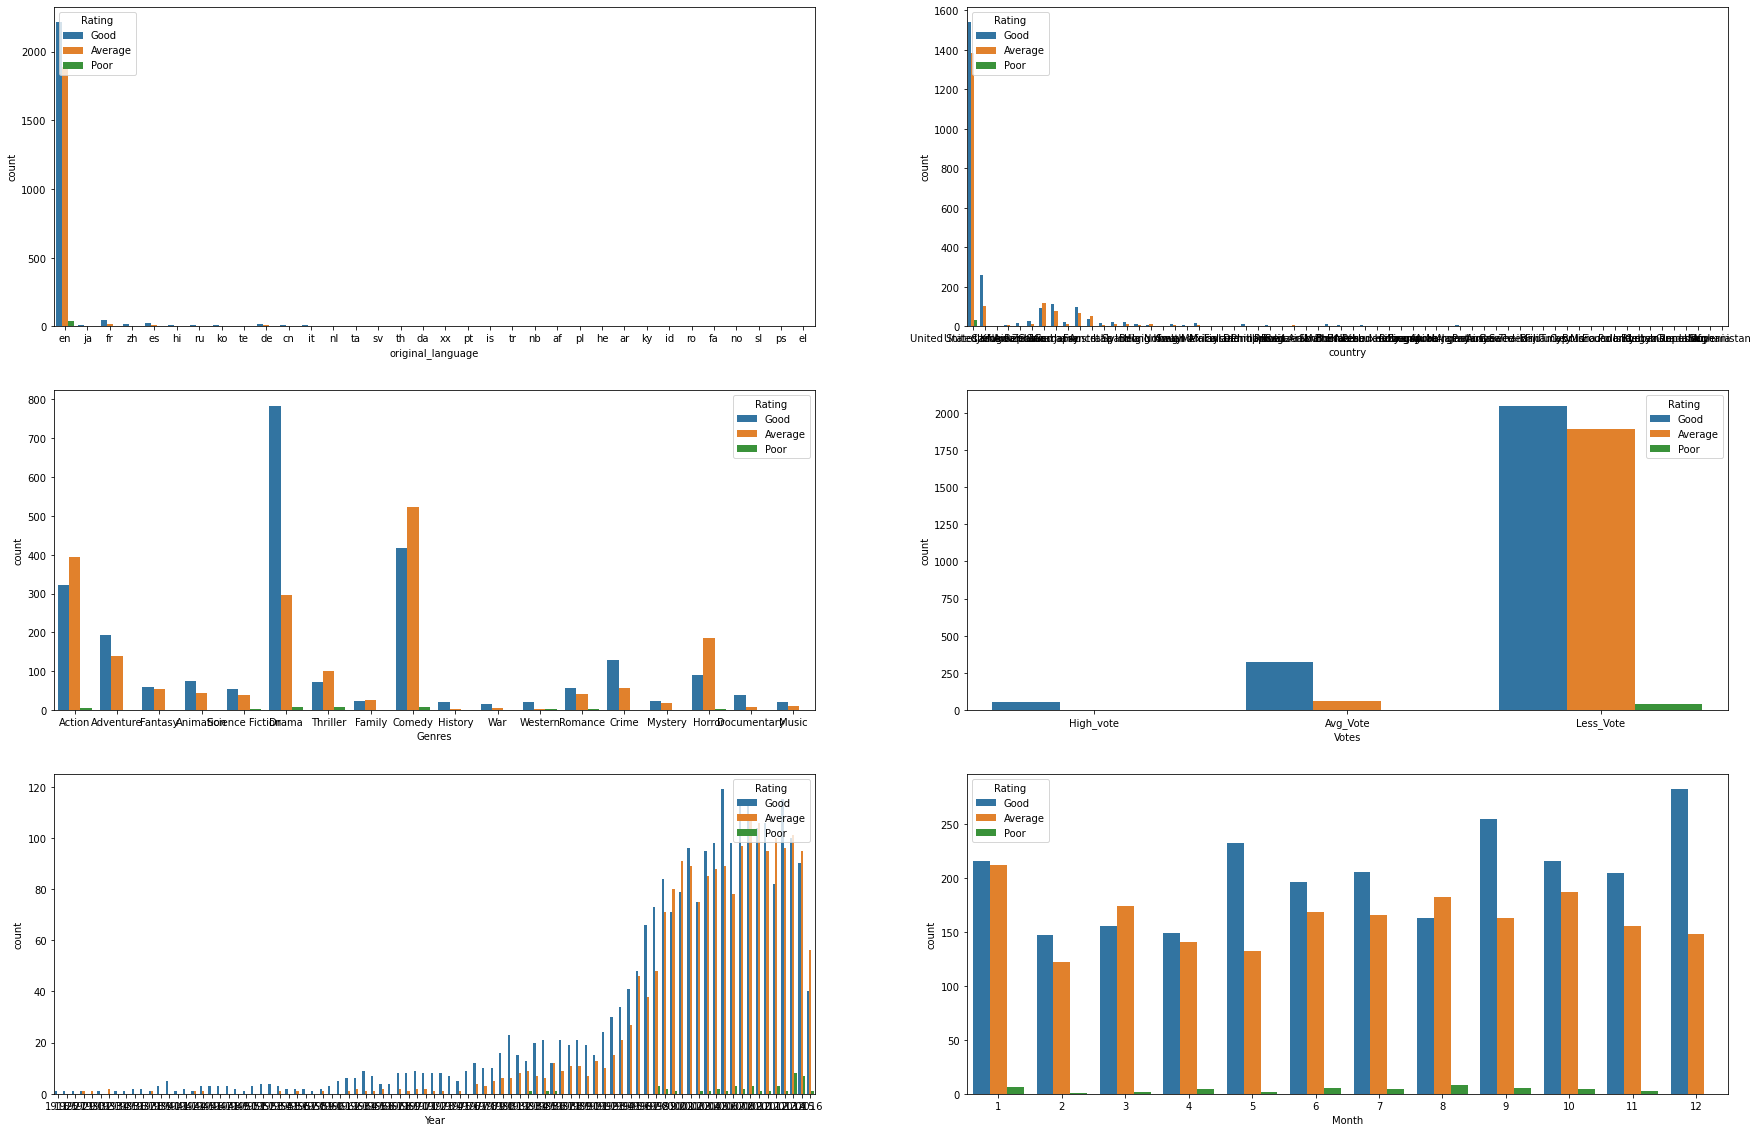

In [18]:
cat=movie_df.select_dtypes('object')
cat.drop(['Director','Main_Production_House','Second_Lead_Actor','Lead_Actor','Rating'],axis=1,inplace=True)
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax=ax.ravel()
for i,j in zip(cat,range(len(cat))):
    sns.countplot(data=movie_df,x=i,hue='Rating',ax=ax[j])

In [19]:
# There are more number of average rating in action and comedy movies

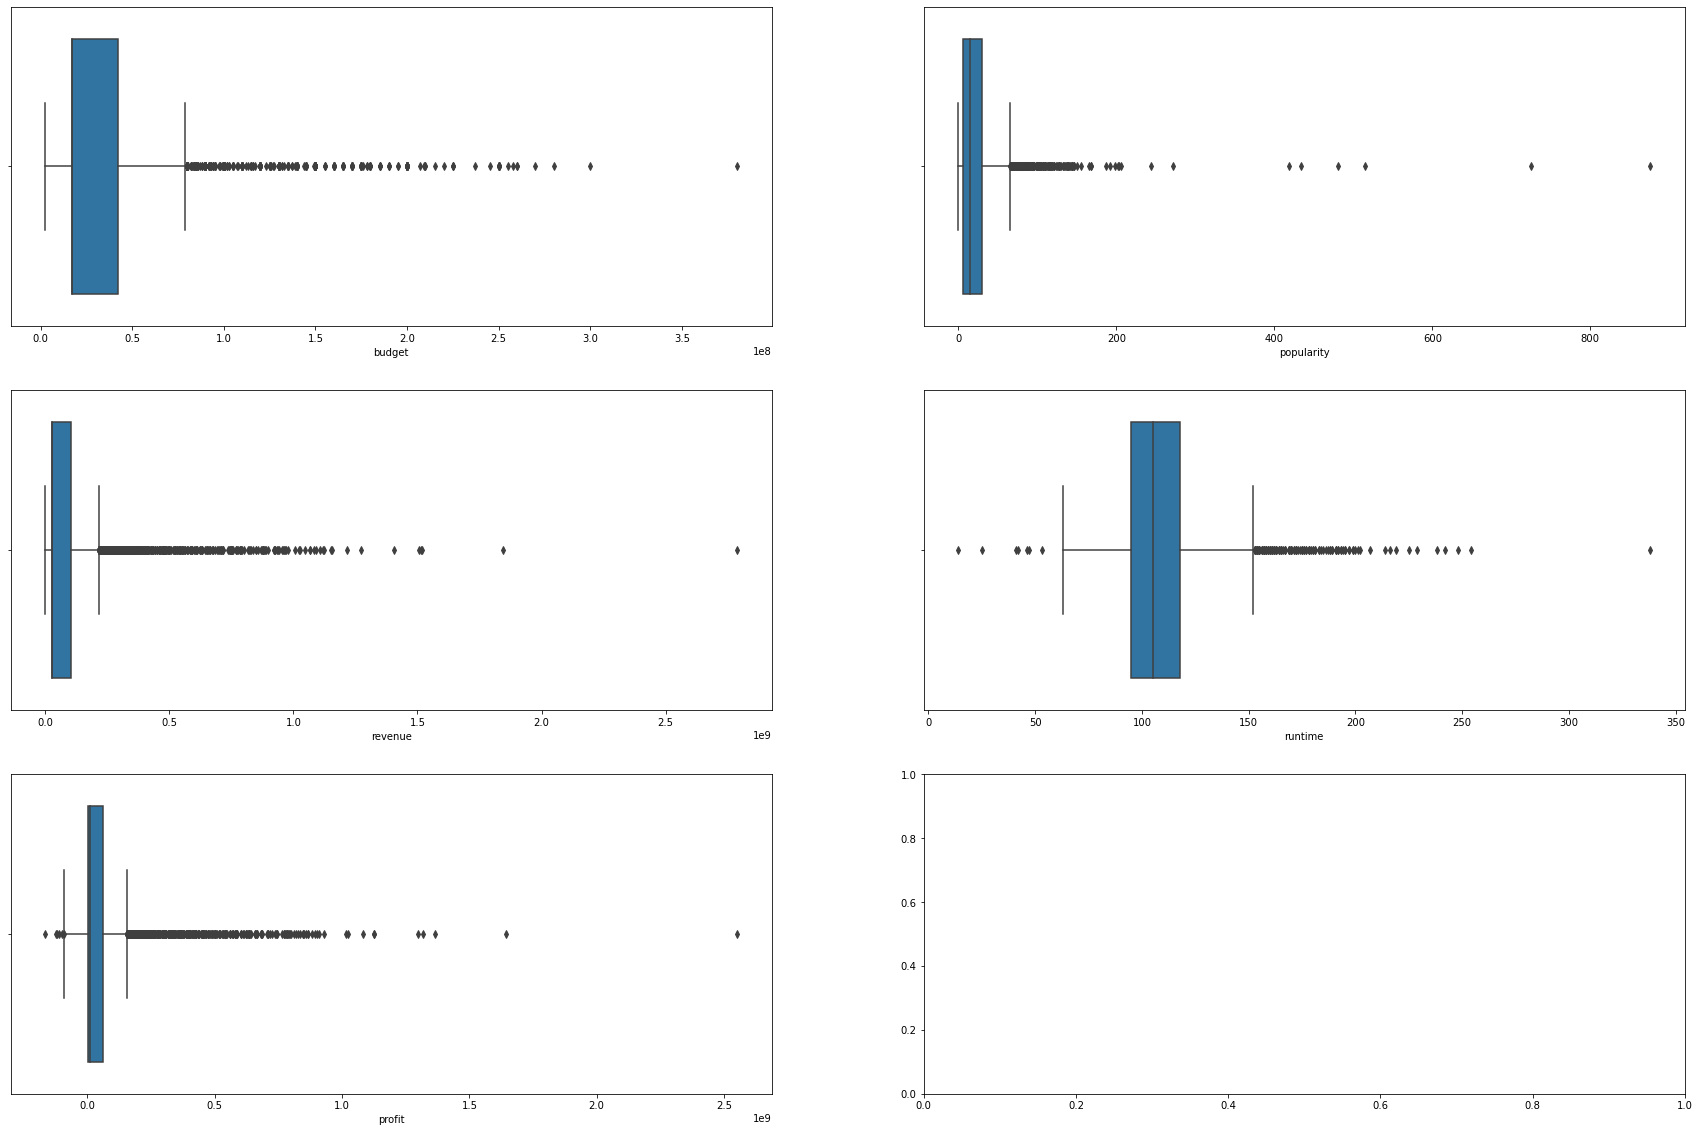

In [20]:
num=movie_df.select_dtypes(['int64','float64'])
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax=ax.ravel()
for i,j in zip(num,range(len(num))):
    sns.boxplot(data=movie_df,x=i,hue='Rating',ax=ax[j])

In [21]:
# Outliers present in this are not false input of the data we keep it as it is.

In [22]:
#Converting data type object to int32
a=list(movie_df.select_dtypes('object'))
for i in a:
    movie_df[i]=LabelEncoder().fit_transform(movie_df[i])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4413 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   budget                 4413 non-null   int64  
 1   original_language      4413 non-null   int32  
 2   popularity             4413 non-null   float64
 3   revenue                4413 non-null   int64  
 4   runtime                4413 non-null   float64
 5   country                4413 non-null   int32  
 6   Lead_Actor             4413 non-null   int32  
 7   Second_Lead_Actor      4413 non-null   int32  
 8   Main_Production_House  4413 non-null   int32  
 9   Genres                 4413 non-null   int32  
 10  Director               4413 non-null   int32  
 11  profit                 4413 non-null   int64  
 12  Votes                  4413 non-null   int32  
 13  Rating                 4413 non-null   int32  
 14  Year                   4413 non-null   int32  
 15  Mont

In [23]:
#Scalling the data to bring to a pericular scale for modelling
scaller_df=pd.DataFrame(MinMaxScaler().fit_transform(movie_df),columns=movie_df.columns)
scaller_df

,budget,original_language,popularity,revenue,runtime,country,Lead_Actor,Second_Lead_Actor,Main_Production_House,Genres,Director,profit,Votes,Rating,Year,Month
0,0.621092,0.181818,0.171813,1.000000,0.456790,1.000000,0.837547,0.997984,0.463150,0.000000,0.377820,1.000000,0.5,0.5,0.920455,0.818182
1,0.788023,0.181818,0.158845,0.344696,0.478395,1.000000,0.476062,0.735484,0.958883,0.058824,0.327892,0.304310,0.0,0.5,0.897727,0.363636
2,0.642289,0.181818,0.122633,0.315884,0.413580,0.984127,0.211942,0.163710,0.198604,0.000000,0.839654,0.294987,0.0,0.5,0.988636,0.818182
3,0.655538,0.181818,0.128271,0.389151,0.466049,1.000000,0.174287,0.668145,0.524438,0.000000,0.154105,0.368336,0.5,0.5,0.954545,0.545455
4,0.682035,0.181818,0.050167,0.101916,0.364198,1.000000,0.916622,0.601210,0.958883,0.000000,0.040326,0.069883,0.0,0.0,0.954545,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,0.038156,0.181818,0.001047,0.009280,0.259259,1.000000,0.219473,0.760484,0.073701,0.352941,0.060970,0.064263,1.0,0.0,0.761364,0.727273
4409,0.038156,0.181818,0.026618,0.000152,0.194444,1.000000,0.863905,0.220565,0.889837,0.823529,0.859818,0.054896,1.0,0.5,0.863636,0.636364
4410,0.038156,0.212121,0.016296,0.000732,0.206790,0.650794,0.139860,0.390726,0.198604,0.000000,0.809890,0.055491,1.0,0.5,0.727273,0.272727
4411,0.038156,0.181818,0.001648,0.009280,0.327160,1.000000,0.288327,0.554839,0.357642,0.176471,0.849736,0.064263,1.0,0.5,0.965909,0.818182


<AxesSubplot:>

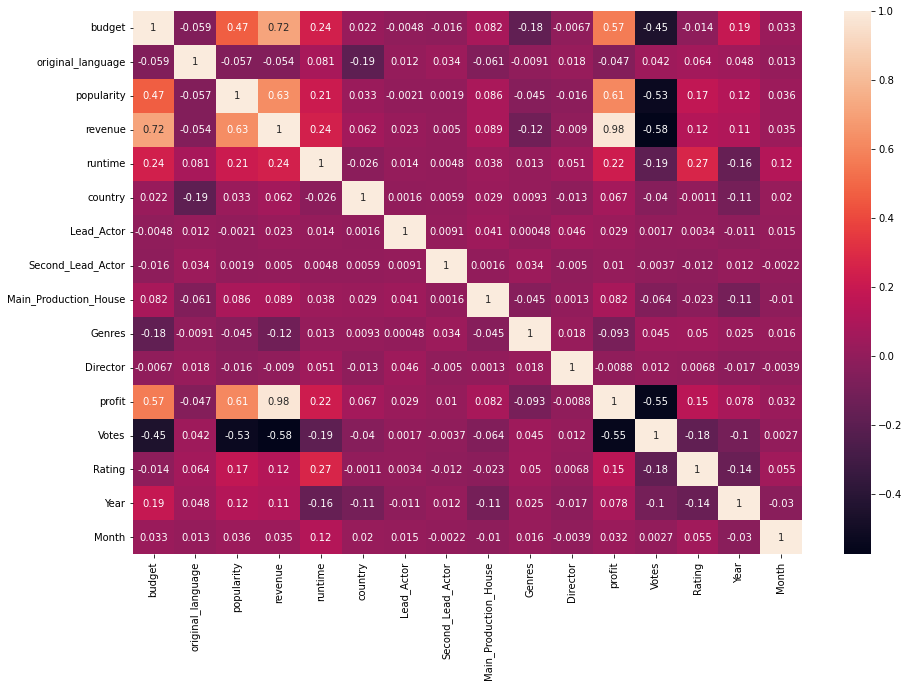

In [24]:
# Visulizing Corelation Matrix using heat map
corr_mat=scaller_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat,annot=True)

In [25]:
# Funtion to identify the corellated columns
def correlation(df,threshold):
    col_corr=set()
    correlation_matrix=df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if(abs(correlation_matrix.iloc[i,j]))>threshold:
                col_name=correlation_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [26]:
correlation(scaller_df,0.7)

{'profit', 'revenue'}

In [27]:
# Dropping Revenue column as feature reduction
scaller_df.drop('revenue',inplace=True,axis=1)

In [28]:
movie_df.Genres.value_counts()

6     1090
3      949
0      723
1      334
10     278
4      188
15     180
2      119
8      115
13     100
14      94
7       50
5       48
12      40
11      33
17      27
9       23
16      22
Name: Genres, dtype: int64

### Resampling the target column and split data into Train and Test data

<AxesSubplot:xlabel='Genres', ylabel='count'>

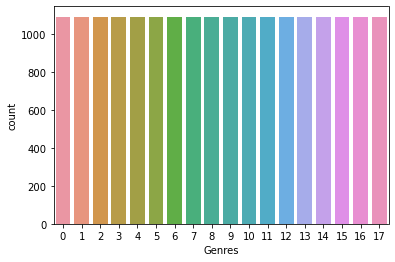

In [29]:
x1=scaller_df.drop('Genres',axis=1)
y1=movie_df.Genres

#min_samples=23
# Balancing the target feature to get accurate result while modeling 
os=SMOTE()                  
X,y=os.fit_resample(x1,y1)

sns.countplot(y)
#ratio={c: min_samples for c in set(y1) if sum(y1==c)>=min_samples

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Logestic Regression

In [31]:
model1=LogisticRegression().fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [32]:
print('R Score for Train set  : ',model1.score(x_train,y_train))
print('R Score for Test  set  : ',model1.score(x_test,y_test))

R Score for Train set  :  0.27408256880733944
R Score for Test  set  :  0.268348623853211


In [33]:
print('Precission Score: ', precision_score(y_test,y_pred1,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred1,average='macro'))

Precission Score:  0.2337634721275993
Recall Score:  0.2665175358151147


In [34]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred1))
print('')
print('Classification report')
print(classification_report(y_test,y_pred1))
print('')

Confusion Matrix
[[ 20  34   6  15   1  13   3   8   4  12  30   9  10   3  16  16  14  14]
 [ 11  42  23   9   1   4   1  13   7  14   6  12   5   1  24   3   5  19]
 [  0   2 119   5   0  13   1  45   1   2  10   1  11   0   4   2   0   1]
 [  6   1  11  11   7  32   3   3   1  10  65  20  10   0   8  18   4   7]
 [ 14   6   0   7  24  25   6   7   1  12  19  14   8   5   7  10  24  18]
 [  0   0  11   3   0 181   0   0   0   7  12  17   7   1   0   1   0   0]
 [  2   1   3   5   9  38   4   2   0  41  17  16   8   5   7  20  24  14]
 [  2   2  45  11   1  18   0  54   2   4  15  10  11   0   1  18   0  13]
 [ 12  12  21   8   1  12   1  17   6  12  17  17  17   1  28   6   9  11]
 [  0   1   0   0   0   0   1   0   0 125   0  14   0   0   0   6  40  20]
 [  4   3   1  12   2  22   0   3   4   3  83  21  20   3   4  18   7  12]
 [  2   1   0  11   1  34   0   0   2  16  20  75   8   0   0   9   7  45]
 [  5   4   5   4   5  39   0   9   1   2  58   1  33   2  14  20  17  11]
 [ 10   

### Naive_bayes

In [35]:
model2=GaussianNB().fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [36]:
print('R Score for Train set: ',model2.score(x_train,y_train))
print('R Score for Test  set: ',model2.score(x_test,y_test))

R Score for Train set:  0.1660295616717635
R Score for Test  set:  0.17380224260958205


In [37]:
print('Precission Score: ', precision_score(y_test,y_pred2,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred2,average='macro'))

Precission Score:  0.25442311152239216
Recall Score:  0.16777778279381772


In [38]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred2))
print('')
print('Classification report')
print(classification_report(y_test,y_pred2))
print('')

Confusion Matrix
[[  2  20   6   0   0  30   2   2   1   9   2 109   9   1  17   3  15   0]
 [  1  21  10   2   1   9   1   2   0   9   0  68  11   2  39   6  17   1]
 [  2   5  66   2   1  22   1   7   0   3   0  63  12   0  19   4  10   0]
 [  0   0   1   0   0  50   0   0   0   2   3 137   7   0  11   1   5   0]
 [  0   1   0   0   2  54   0   0   0   1   0 124   8   0  12   3   2   0]
 [  0   0   0   0   0 222   2   0   0   0   1  15   0   0   0   0   0   0]
 [  0   4   1   0   1  64   2   0   0   8   0  97   5   0  12   4  17   1]
 [  0   3  30   1   0  39   1   6   3   1   0  96  11   0   8   3   5   0]
 [  3   7  13   0   0  18   0   0   5   6   1  96  11   0  32   8   8   0]
 [  1   8   0   0   0  31   6   0   0  26   0  88   0   1   7   0  37   2]
 [  1   0   0   0   1  43   0   0   0   4   7 134  17   0   9   0   6   0]
 [  0   0   0   0   0  42   0   0   0   0   0 188   1   0   0   0   0   0]
 [  0   0   0   0   0  58   1   0   0   0   0 116  24   0  15   1  15   0]
 [  0   

### Decission Tree

In [39]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [40]:
# dt=DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

In [41]:
# param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
#            'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
#            'max_depth':[3,4,5,6,7,8,9,10],
#            'max_features':[2,3,4,5,6,7]}

In [42]:
# gridcv=GridSearchCV(dt,param_grid,cv=kf)

In [43]:
# gridcv.fit(x_train,y_train)

In [44]:
# gridcv.best_score_

In [45]:
# gridcv.best_estimator_

In [46]:
model3=DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_split=3,random_state=42).fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [47]:
print('R Score for Train set: ',model3.score(x_train,y_train))
print('R Score for Test  set: ',model3.score(x_test,y_test))

R Score for Train set:  0.5542813455657493
R Score for Test  set:  0.46075433231396534


In [48]:
print('Precission Score: ', precision_score(y_test,y_pred3,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred3,average='macro'))

Precission Score:  0.4520557791965649
Recall Score:  0.4597718024737802


In [49]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred3))
print('')
print('Classification report')
print(classification_report(y_test,y_pred3))
print('')

Confusion Matrix
[[ 36  30   8  13   8   4   7   9   9  10  14  18  10  18  13  15   3   3]
 [ 16  74   7   3  10   4   3   8  10   2   7  10  11  11  14   4   3   3]
 [  4  12 139   6   2   3   3  18  10   0   1   1   0   2   6   5   1   4]
 [  9  18  12  26   5   7   5   7   8   3  20  25  17  22  11  16   2   4]
 [  2  12   4  11  38  10  12   6   6   6  14  21   8  32   7   7   6   5]
 [  0   0   0   2   1 193   5   2   0   2   2  15   2   7   3   3   0   3]
 [  4   5   3  10  14  22  38   4   9  10  10  13  11  20   9  16   5  13]
 [  3  17   8   3   1   4   0 122   7   0   5  10   5   5   2   6   3   6]
 [ 10  30   4   6  11   3   6  11  63   2   4  11   6  22   5   5   5   4]
 [  3   2   1   0  10   1   1   0   1 173   1   5   0   1   5   2   1   0]
 [  7  13   6   9   6   1   6   7   8   2  81  12  21  14   9  15   1   4]
 [  1   6   1   4  10   5   1  10   1   1   6 167   7   3   1   3   1   3]
 [  2  14   0   4   3   7   1   4   8   1  14   6 132  10  11  12   1   0]
 [  5  2

### Random Forest

In [50]:
# rf=RandomForestClassifier(random_state=42).fit(x_train,y_train)

In [51]:
# param_grid={'n_estimators':[10,20,40,50,70,100,150,200],
#            'min_samples_split':[10,20,30],
#            'min_samples_leaf':[20,40,100],
#            'max_depth':[3,4,5,6,7,8,9,10]}

In [52]:
# grid_cv2=GridSearchCV(rf,param_grid,cv=kf)

In [53]:
# grid_cv2.fit(x_train,y_train)

In [54]:
# grid_cv2.best_score_

In [55]:
# grid_cv2.best_estimator_

In [56]:
model4=RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,n_estimators=200, random_state=42).fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [57]:
print('R Score for Train set: ',model4.score(x_train,y_train))
print('R Score for Test  set: ',model4.score(x_test,y_test))

R Score for Train set:  0.7024719673802242
R Score for Test  set:  0.6149337410805301


In [58]:
print('Precission Score: ', precision_score(y_test,y_pred4,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred4,average='macro'))

Precission Score:  0.5850376919090785
Recall Score:  0.6140051572835614


In [59]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred4))
print('')
print('Classification report')
print(classification_report(y_test,y_pred4))
print('')

Confusion Matrix
[[ 33  35   9  12   6  12   9  10   9  17  14  10   6   4  22   7   8   5]
 [  9  80  22   3   2   6   2   7  11  11   3   5   6   3  13   1   9   7]
 [  0   0 193   2   0   4   0   5   1   3   4   1   2   0   0   2   0   0]
 [ 13   1  10  25   5  23  11   6   7   6  53   9  14  11   3  12   1   7]
 [  7   3   0   1  73  12  11   4   4  13  17  11   8   5   4   9  16   9]
 [  0   0   1   1   0 232   0   0   0   3   3   0   0   0   0   0   0   0]
 [  4   9   0  13  13  35  34   1   2  32  15  13   3   4   7   8  14   9]
 [  1   0  12   0   2   7   1 169   1   0   2   3   0   1   2   0   0   6]
 [  7   4   8   1   8  10   4   5 118   5   7   6  11   0   3   2   8   1]
 [  0   0   0   0   0   0   0   0   0 206   0   1   0   0   0   0   0   0]
 [  8   1   2   5   7   9   1   7   8   1 126   3  11   2   6  11   6   8]
 [  2   0   0   0   1   5   0   1   1   1   1 214   0   0   2   0   0   3]
 [  0   0   0   2   2   6   0   4   1   0  10   4 194   0   1   0   1   5]
 [  1   

### Stacking

In [60]:
level1=[]
level1.append(('lr',LogisticRegression()))
level1.append(('KNN',KNeighborsClassifier()))
level1.append(('ny',GaussianNB()))
level1.append(('SVM',SVC()))
level1.append(('DT',DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_split=5,random_state=42)))
level1.append(('RF',RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,n_estimators=200, random_state=42)))
level2=LogisticRegression()
stack_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [61]:
model5=stack_model.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

In [62]:
print('R Score for Train set: ',model5.score(x_train,y_train))
print('R Score for Test  set: ',model5.score(x_test,y_test))

R Score for Train set:  0.8639780835881753
R Score for Test  set:  0.7935779816513762


In [63]:
print('Precission Score: ', precision_score(y_test,y_pred5,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred5,average='macro'))

Precission Score:  0.7702768495426487
Recall Score:  0.7941461999425717


In [64]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred5))
print('')
print('Classification report')
print(classification_report(y_test,y_pred5))
print('')

Confusion Matrix
[[ 56  23   4  19  17   0  32   0  15   3  19   1   5   9   5  11   2   7]
 [  8 152   4   2   1   2   7   1   3   2   2   1   1   0   8   3   2   1]
 [  1   1 202   2   0   2   2   0   5   0   0   0   1   0   0   1   0   0]
 [ 18  12   4  54   7   7  27   6   8   2  24   2   9  10   6  13   1   7]
 [  0   3   0   3 172   1   7   1   3   1   4   1   1   4   3   0   0   3]
 [  0   2   1   1   0 235   0   0   0   0   0   0   0   1   0   0   0   0]
 [ 10   6   1  22  15   8  70   4   8   2  14  10   5  11   6  15   1   8]
 [  0   0   2   1   0   1   0 202   0   0   1   0   0   0   0   0   0   0]
 [  3   1   3   0   2   1   0   3 186   0   0   1   1   0   5   0   1   1]
 [  0   0   0   0   0   0   5   0   1 199   0   1   0   0   0   0   1   0]
 [  4   3   3  12   3   0   6   4   4   0 162   2   2   1   2   8   2   4]
 [  2   0   2   0   0   0   1   2   0   0   0 224   0   0   0   0   0   0]
 [  1   0   6   2   0   0   0   0   0   0   2   0 218   0   1   0   0   0]
 [  5   

### Boosting

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
# ada=AdaBoostClassifier()

In [67]:
# param_grid={'n_estimators':[10,20,40,50,70,100,150,200],
#            'learning_rate':[0.001,0.01,0.1,1]}

In [68]:
kf=KFold(n_splits=5)

In [69]:
# grid_cv=GridSearchCV(ada,param_grid,cv=kf)

In [70]:
# grid_cv.fit(x_train,y_train)

In [71]:
# grid_cv.best_score_

In [72]:
# grid_cv.best_estimator_

In [73]:
model6=AdaBoostClassifier(learning_rate=0.1, n_estimators=200).fit(x_train,y_train)
y_pred6=model6.predict(x_test)

In [74]:
print('R Score for Train set: ',model6.score(x_train,y_train))
print('R Score for Test  set: ',model6.score(x_test,y_test))

R Score for Train set:  0.25828236493374107
R Score for Test  set:  0.2492354740061162


In [75]:
print('Precission Score: ', precision_score(y_test,y_pred6,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred6,average='macro'))

Precission Score:  0.25750702203208026
Recall Score:  0.2480357692267858


In [76]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred6))
print('')
print('Classification report')
print(classification_report(y_test,y_pred6))
print('')

Confusion Matrix
[[  8  23   2  39  31   7  11   3   3  10  12   9   9  12  20  15  10   4]
 [  7  29   8  18  20   3   7   5   2  13   5   5  10   8  34   8  11   7]
 [  5   0  41  19   0   4   0  23   3   2  16   1  42   0  60   1   0   0]
 [  2   1   1  42  22   9  12   9   0   2  43  14  19  18  11   7   2   3]
 [  1   0   0  10  55   7  14   2   2  10  15  12   7  20   4  17  21  10]
 [  0   0   2  12   2 137  20   8   0   1   9  34   7   6   0   0   2   0]
 [  3   3   1  18  30  15  48   1   1  17  14  18   3  11   1   8  19   5]
 [  0   3  27  30   8   7   4  21   8   2  16   5  32   9  29   1   0   5]
 [  7   7   9  12  23   4   1   4  10   9  18  13  14  14  44   4  15   0]
 [  0  10   0   0  23   8  16   0   1  70   0   3   0   0   0   0  64  12]
 [  3   1   3  30  17   2   4   7   2   2 105   4  11   4  12   5   6   4]
 [  0   0   0  21  25   3  21   0   0   5   6  92  21   8  11   0   5  13]
 [  1   2   0  37  30  15   3  19   2   0  35   6  44  12   9   5   5   5]
 [  1   

### KNN

In [77]:
score1=[]
for i in range(2,30):
    score=cross_val_score(KNeighborsClassifier(i),X,y,cv=5,scoring='accuracy')
    print(f'{i} : ',np.mean(score))
    score1.append(score)

2 :  0.8466870540265035
3 :  0.8290519877675842
4 :  0.8146279306829765
5 :  0.798369011213048
6 :  0.7846075433231398
7 :  0.7731396534148828
8 :  0.7593781855249746
9 :  0.7473496432212029
10 :  0.735677879714577
11 :  0.7262487257900101
12 :  0.7178389398572884
13 :  0.7093781855249746
14 :  0.6999490316004078
15 :  0.6933741080530071
16 :  0.6856269113149847
17 :  0.6793068297655454
18 :  0.6704892966360857
19 :  0.6626911314984709
20 :  0.6578491335372069
21 :  0.6514271151885831
22 :  0.6455147808358818
23 :  0.6388888888888888
24 :  0.6331294597349644
25 :  0.6282364933741081
26 :  0.6249745158002039
27 :  0.6200305810397554
28 :  0.6149847094801224
29 :  0.6103465851172274


In [78]:
k=2
model7=KNeighborsClassifier(k).fit(x_train,y_train)
y_pred7=model7.predict(x_test)
y_pred7

array([12, 14, 14, ..., 10, 16, 11])

In [79]:
print('R Score for Train set: ',model7.score(x_train,y_train))
print('R Score for Test  set: ',model7.score(x_test,y_test))

R Score for Train set:  0.9496049949031601
R Score for Test  set:  0.8312945973496432


In [80]:
print('Precission Score: ', precision_score(y_test,y_pred7,average='macro'))
print('Recall Score: ',recall_score(y_test,y_pred7,average='macro'))

Precission Score:  0.8124877889896445
Recall Score:  0.8314665159191966


In [81]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred7))
print('')
print('Classification report')
print(classification_report(y_test,y_pred7))
print('')

Confusion Matrix
[[135  14   3  11  10   0   6   1   9   3  12   2   4   4   4   7   0   3]
 [ 13 177   2   2   2   0   0   1   0   0   0   0   2   0   0   1   0   0]
 [  1   0 211   1   0   1   0   0   2   0   0   0   0   0   0   1   0   0]
 [ 30  23   8  71   8   8  13   4   7   3  12   3   7   8   4   3   2   3]
 [  0   2   0   5 191   1   2   0   0   0   0   1   0   2   2   0   0   1]
 [  0   1   0   0   0 239   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 40  13   2  35  14  11  34   4   8   5   6   7   9   7   4  13   3   1]
 [  1   2   0   3   0   0   1 199   0   0   0   0   0   0   0   0   0   1]
 [  7   1   3   5   2   0   6   3 180   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1 206   0   0   0   0   0   0   0   0]
 [  9   2   1  13   2   0   8   2   2   0 177   1   2   0   0   2   1   0]
 [  1   0   0   2   1   0   1   0   0   0   0 226   0   0   0   0   0   0]
 [  0   1   2   2   1   0   2   0   0   0   2   0 220   0   0   0   0   0]
 [  2   